In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df_data = pd.read_csv('lending_data.csv')

# Review the DataFrame
df_data.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [3]:
print(f'df_data row count: {len(df_data)}')

df_data row count: 77536


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [4]:
# Separate the data into labels and features
# Separate the y variable, the labels
y = df_data['loan_status']

# Separate the X variable, the features
X = df_data.drop(columns='loan_status')

In [5]:
# Review the y variable Series
y.value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

In [6]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [7]:
# Split the data using train_test_split
# Assign a random_state of 1 to the function

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [8]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(solver='lbfgs', random_state=1)

# Fit the model using training data
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [9]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test})
results.head(10)

,Prediction,Actual
36831,0,0
75818,0,1
36563,0,0
13237,0,0
43292,0,0
68423,0,0
37714,0,0
64870,0,0
47959,0,0
49,0,0


In [10]:

accuracy_score(y_test, predictions)

0.9924164259182832

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [11]:
# Generate a confusion matrix for the model
print(confusion_matrix(y_test, predictions))

[[18679    80]
 [   67   558]]


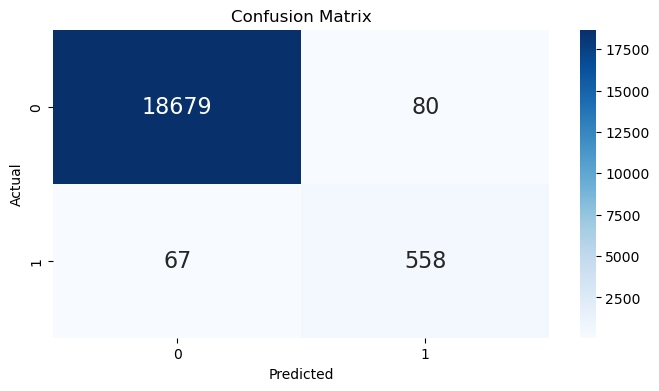

In [12]:
# Generate the confusion matrix

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 4))  # Adjust the figure size here
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            
            annot_kws={"size": 16})  # Adjust annotation font size here
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [13]:
# Print the classification report for the model
target_names = ["Healthy Loan", "High-risk Loan"]
print(classification_report(y_test, predictions, target_names=target_names))

                precision    recall  f1-score   support

  Healthy Loan       1.00      1.00      1.00     18759
High-risk Loan       0.87      0.89      0.88       625

      accuracy                           0.99     19384
     macro avg       0.94      0.94      0.94     19384
  weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** 
 #### Overview
The overall accuracy is 99%, with macro and weighted averages across metrics indicating **strong performance** across both classes.

#### Breakdown
- The model achieves f1-score of `1.00` for "Healthy Loan", indicating it correctly identifies nearly all healthy loans with a low number of false positives as shown in the confusion matrix.

- For "High-risk Loan", scores are lower but still high with an f1-score of `0.88`, showing good model performance in identifying high-risk loans with some room for improvement.



---